In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA



In [4]:
df =  pd.read_csv('dataset.csv')

In [5]:
df.head()

,Age,Annual Income,Spending Score,Gender,Location,Family Size,Occupation,Education
0,56,72642,13,Female,Rural,3,Engineer,High School
1,46,45151,94,Male,Rural,3,Clerk,Undergraduate
2,32,81407,4,Female,Rural,6,Teacher,PhD
3,25,96690,34,Male,Urban,1,Teacher,PhD
4,38,34499,86,Female,Urban,4,Technician,Graduate


In [6]:
# label encoding data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Gender', 'Location', 'Occupation','Education']:
    df[i] = le.fit_transform(df[i])


In [7]:
# check for null value
df.isnull().sum()


Age               0
Annual Income     0
Spending Score    0
Gender            0
Location          0
Family Size       0
Occupation        0
Education         0
dtype: int64

In [8]:
df = df.drop(columns=['Education'])

In [9]:
sc = StandardScaler()
# for i in ['Annual Income','Spending Score']:
#     df[i] = sc.fit_transform(df[i])
#     print(df[i].head())
df_scaled = sc.fit_transform(df)

<Axes: >

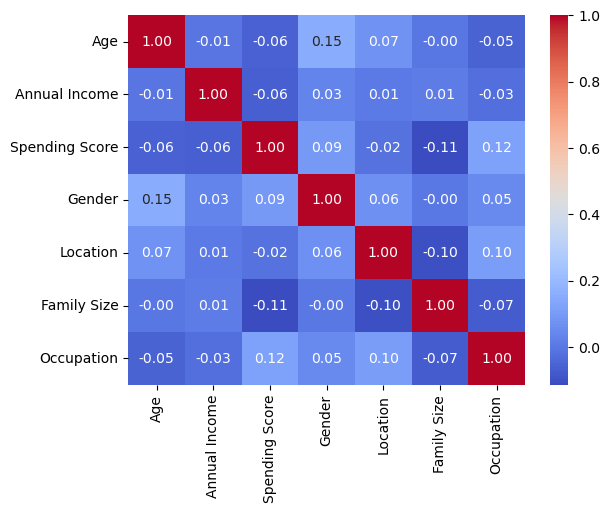

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

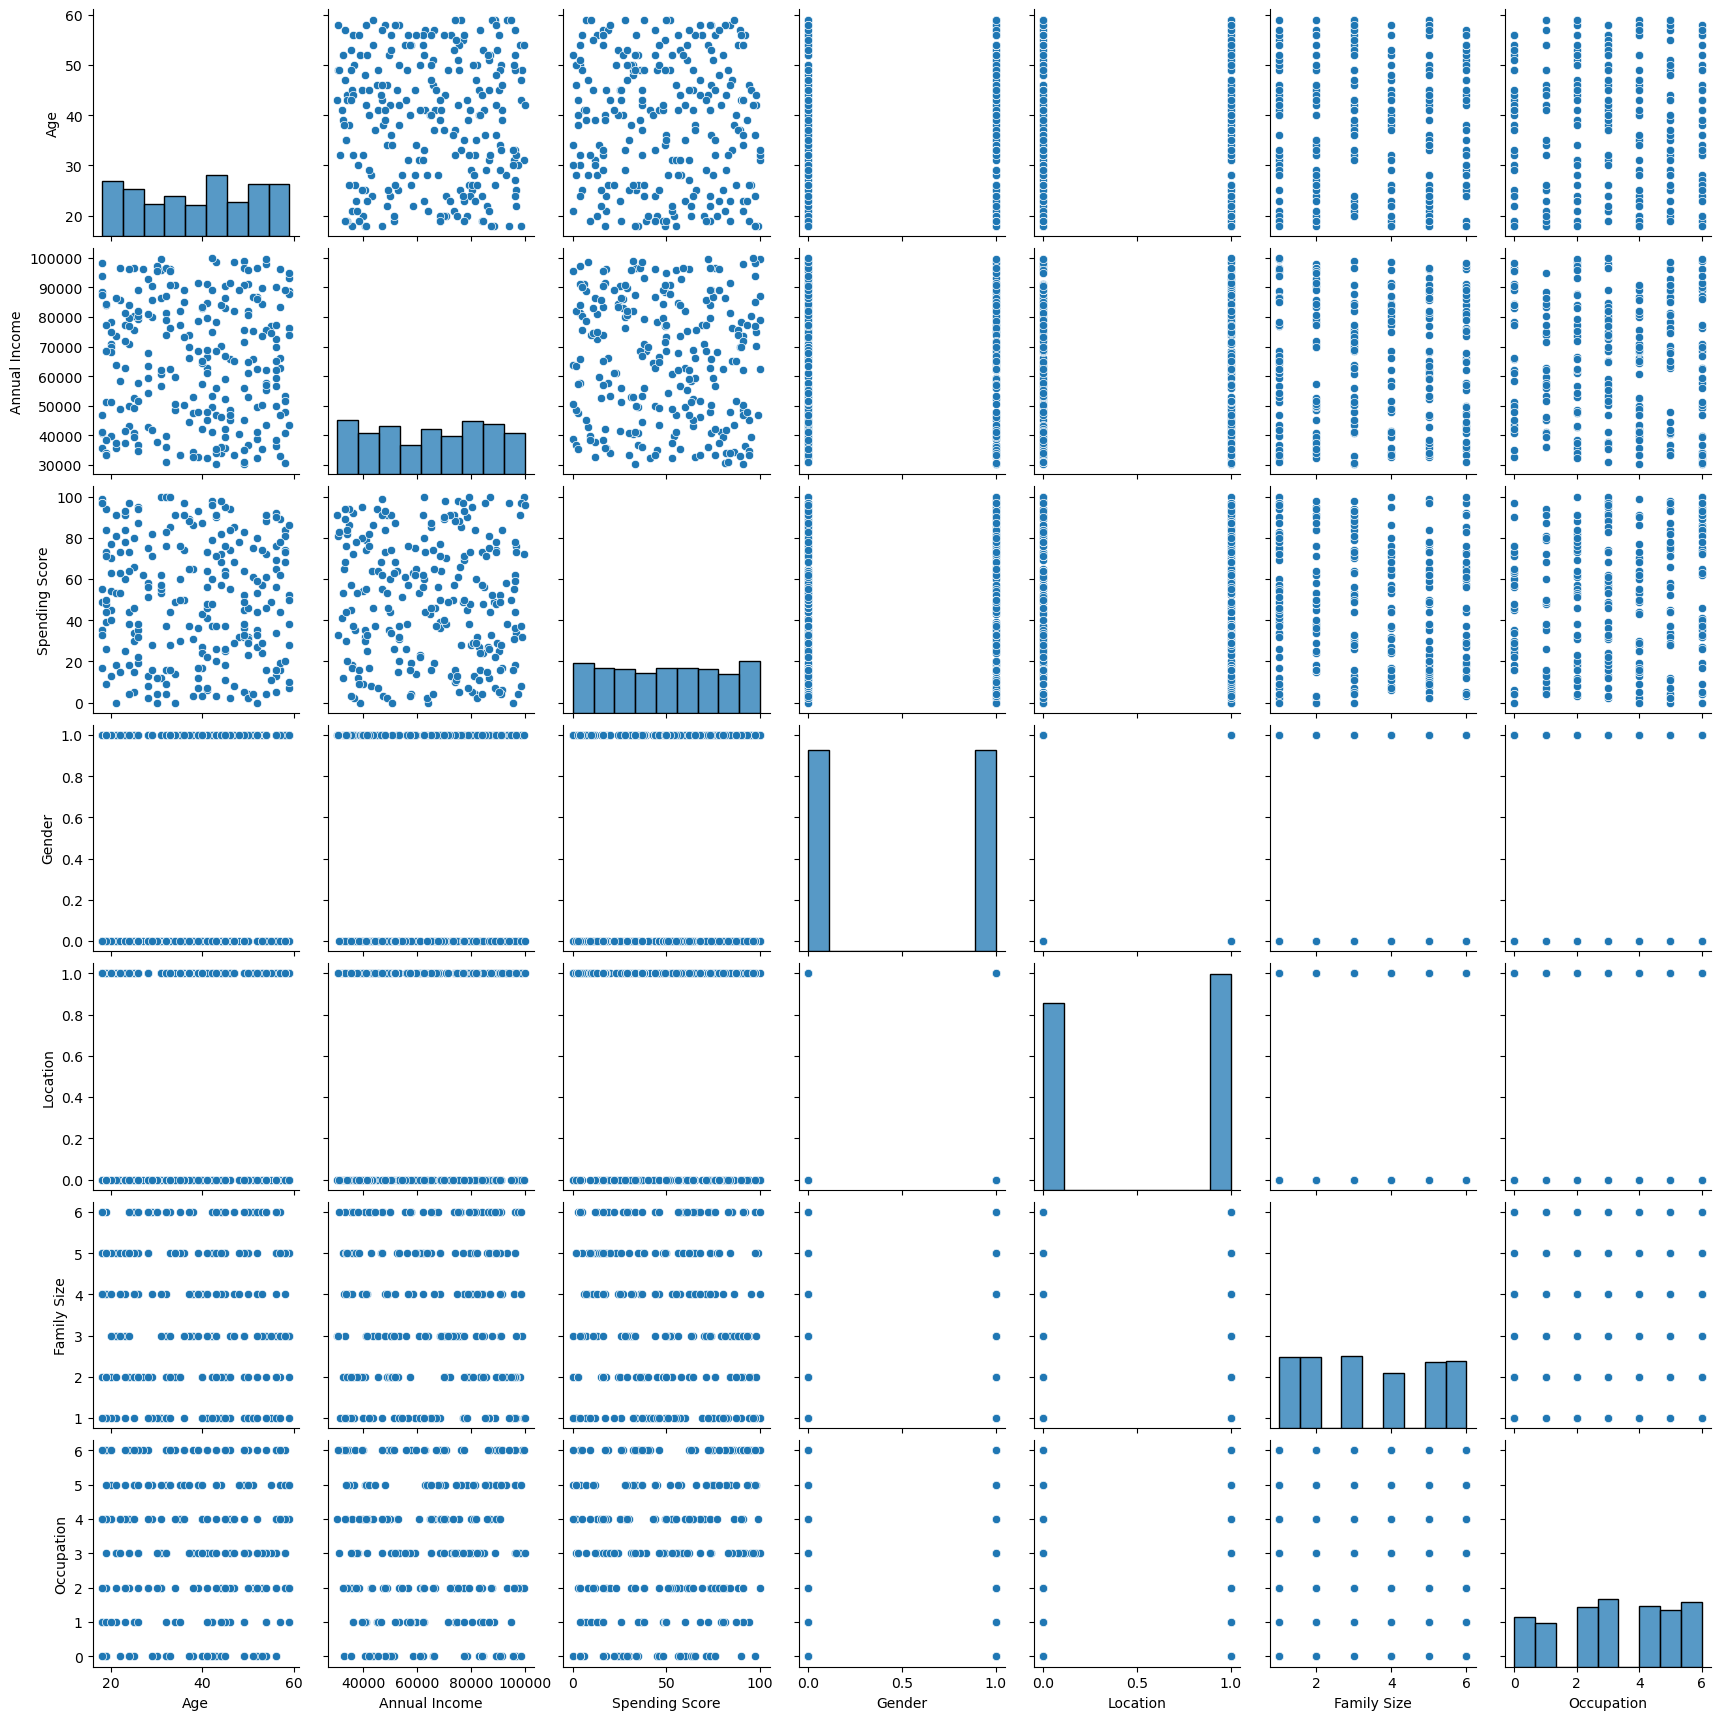

In [11]:
sns.pairplot(df)

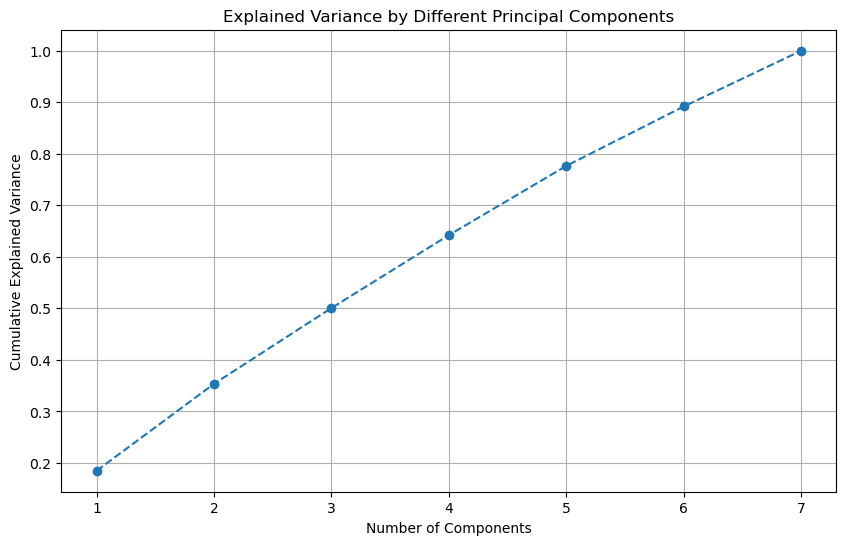

Explained variance ratio by each component: [0.18495849 0.16866272 0.14708196 0.14151236 0.13432787 0.1152349
 0.1082217 ]
Cumulative explained variance: [0.18495849 0.35362121 0.50070317 0.64221553 0.7765434  0.8917783
 1.        ]


In [13]:
from sklearn.decomposition import PCA


pca = PCA()
principal_components = pca.fit_transform(df_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.grid(True)
plt.show()
print("Explained variance ratio by each component:", explained_variance)
print("Cumulative explained variance:", cumulative_variance)


In [14]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_scaled)


In [15]:
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

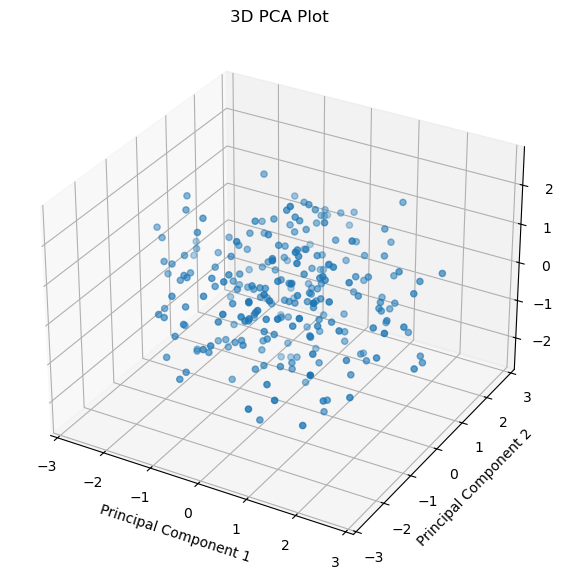

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Plot')

plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

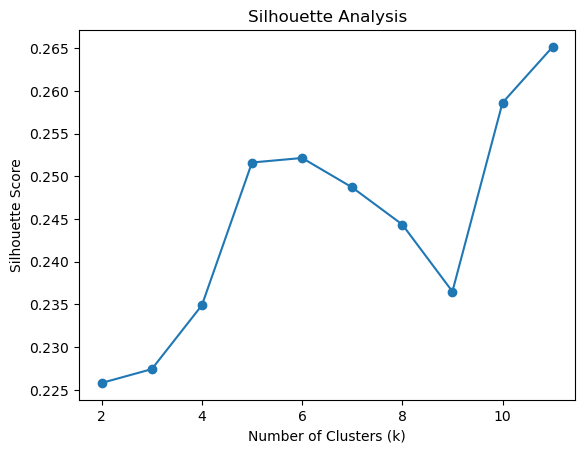

The best optimal number of clusters based on silhouette score is: 11


In [17]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# Compute silhouette scores for different k values
silhouette_scores = []

for k in range(2, 12):  # Silhouette requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_df)
    silhouette_scores.append(silhouette_score(pca_df, labels))

# Plot Silhouette scores
plt.plot(range(2, 12), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()
best_k = range(2, 12)[silhouette_scores.index(max(silhouette_scores))]
print(f"The best optimal number of clusters based on silhouette score is: {best_k}")

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

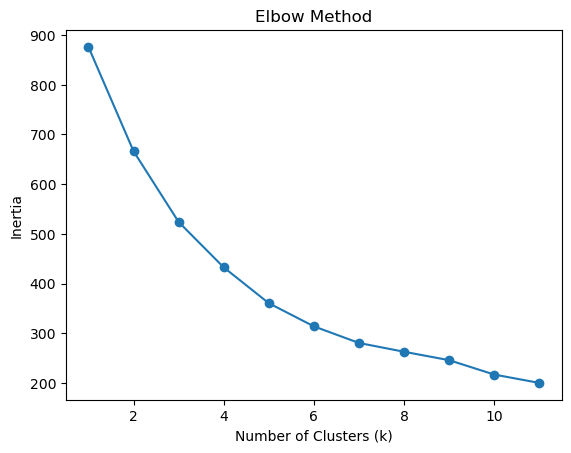

The optimal number of clusters is: 11


In [18]:

# Compute inertia for different k values
inertia_values = []
k_values = range(1, 12)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia_values.append(kmeans.inertia_)
    
# Plot the Elbow Method graph
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()
optimal_k = k_values[inertia_values.index(min(inertia_values))]
print(f"The optimal number of clusters is: {optimal_k}")


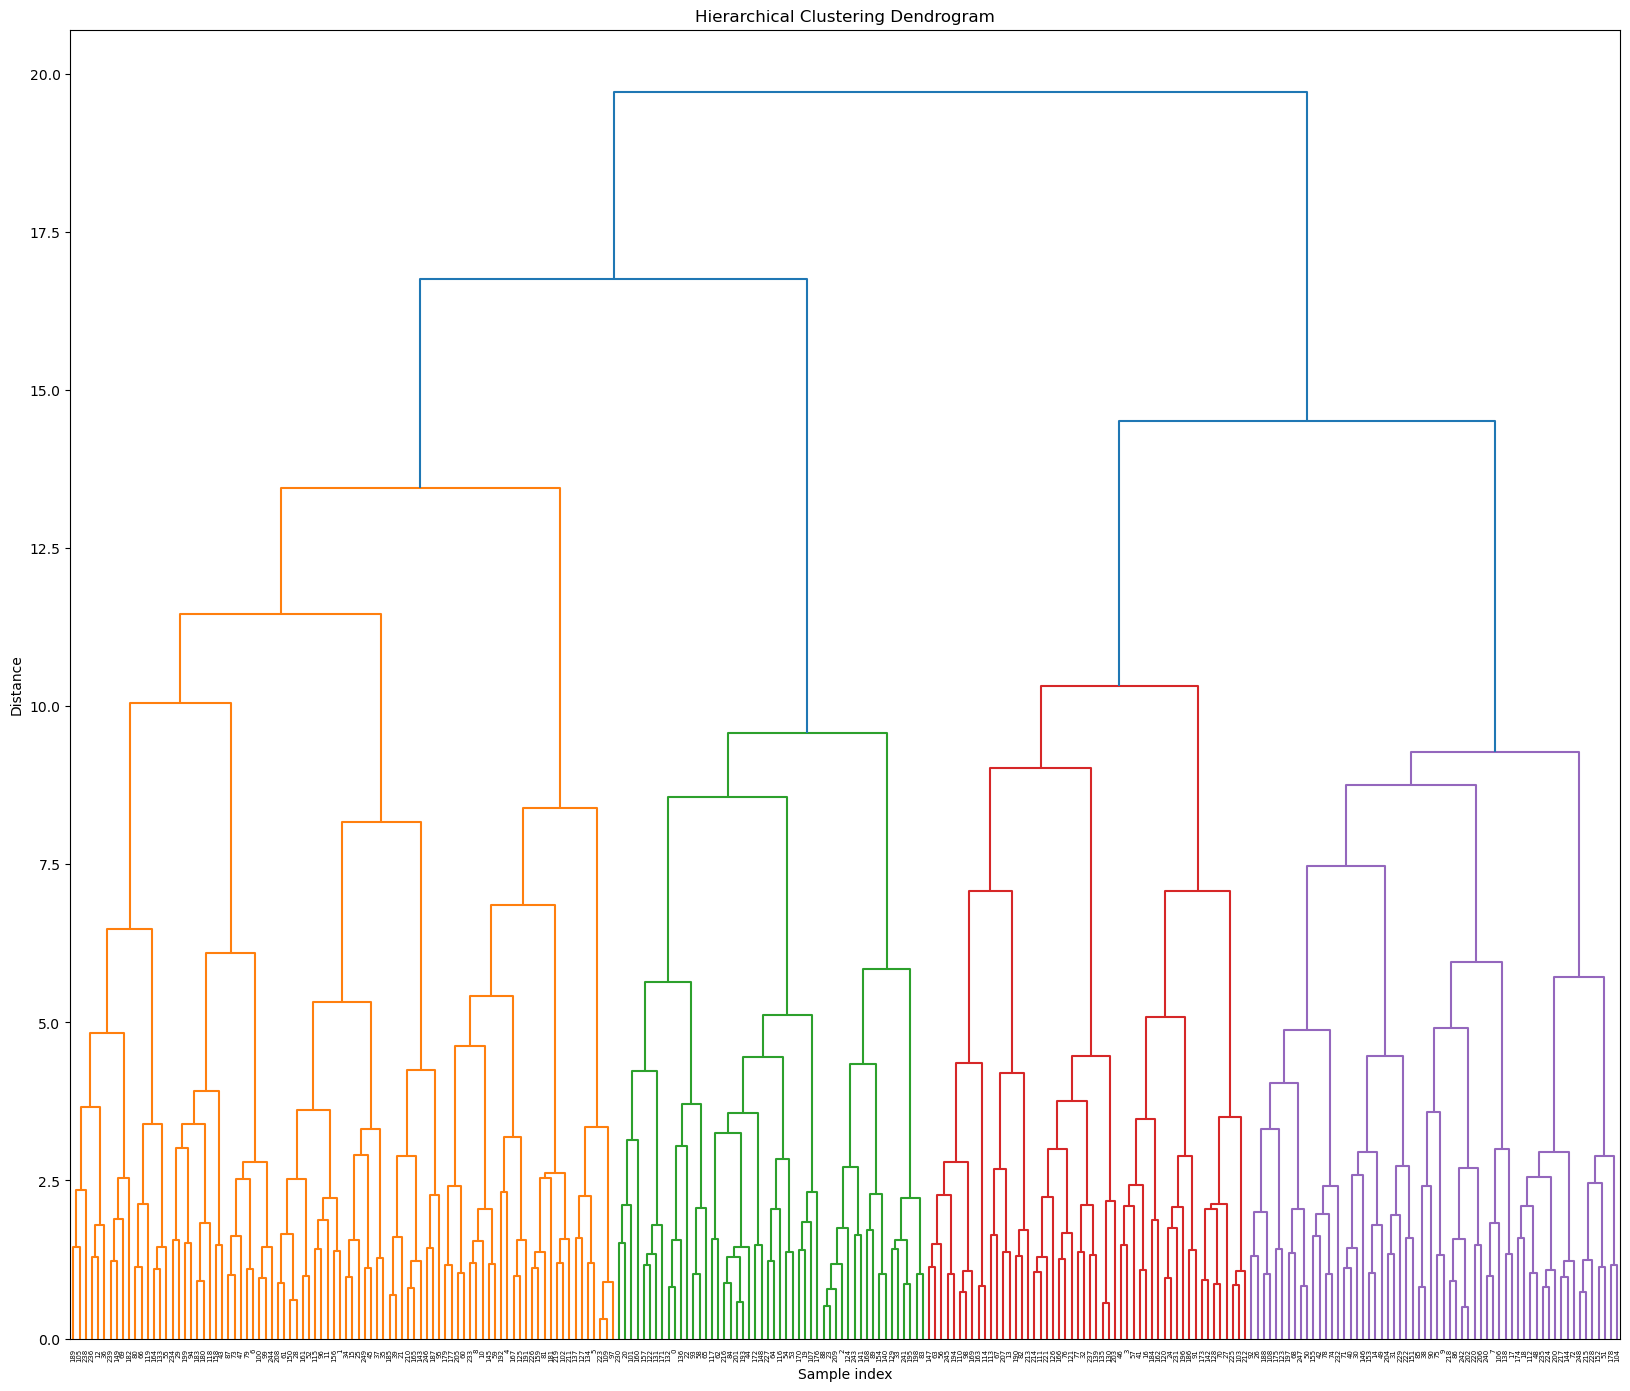

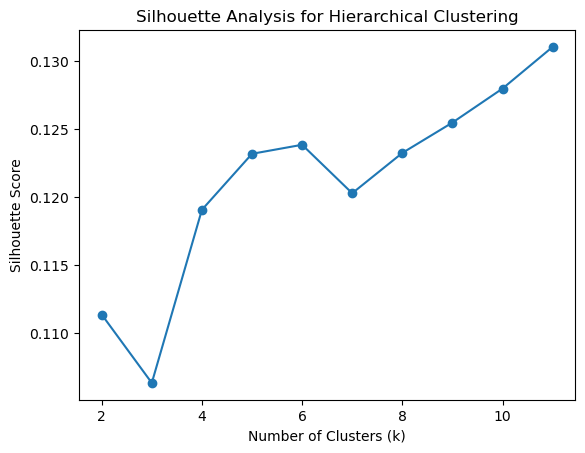

The best optimal number of clusters based on silhouette score for hierarchical clustering is: 11


In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
# Perform hierarchical clustering
linked = linkage(df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(20, 17))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Determine the optimal number of clusters using the silhouette method
silhouette_scores_hierarchical = []
for n_clusters in range(2, 12):
    hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hierarchical_clustering.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores_hierarchical.append(silhouette_avg)

# Plot Silhouette scores
plt.plot(range(2, 12), silhouette_scores_hierarchical, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Hierarchical Clustering")
plt.show()

best_k_hierarchical = range(2, 12)[silhouette_scores_hierarchical.index(max(silhouette_scores_hierarchical))]
print(f"The best optimal number of clusters based on silhouette score for hierarchical clustering is: {best_k_hierarchical}")

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


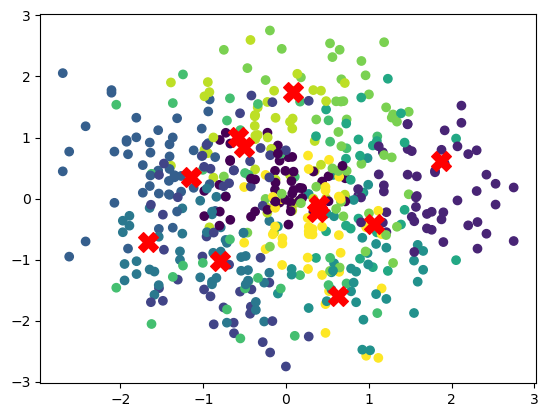

In [20]:

kmeans = KMeans(n_clusters=11)
pca_df_kmeans = kmeans.fit_predict(pca_df)
labels = kmeans.predict(pca_df)
plt.scatter(data=pca_df, y='PC1',x='PC2', c=labels, cmap='viridis')
plt.scatter(data=pca_df, y='PC3',x='PC2', c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.show()


In [21]:
from sklearn.metrics import silhouette_score
score_with_kmean = silhouette_score(df_scaled, pca_df_kmeans)
print(f'Silhouette Score with KMeans: {score_with_kmean}')

Silhouette Score with KMeans: 0.07131543831311113


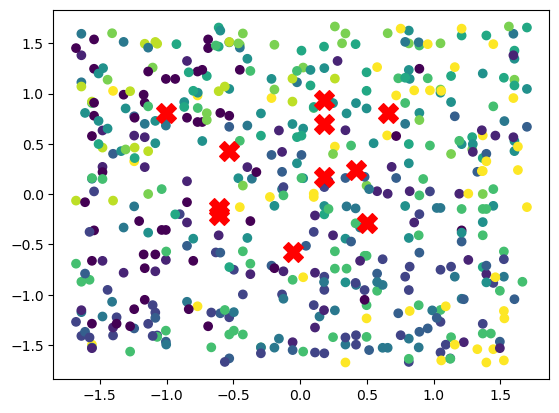

Silhouette Score with KMedoids: 0.10690706326167528


In [22]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=11, random_state=42)
pca_df_kmedoids = kmedoids.fit_predict(df_scaled)
labels = kmedoids.labels_

# Visualize
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(df_scaled[:, 2], df_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(df_scaled[kmedoids.medoid_indices_, 0], df_scaled[kmedoids.medoid_indices_, 1], s=200, c='red', marker='X')
plt.show()
score_with_kmedoids = silhouette_score(df_scaled, pca_df_kmedoids)
print(f'Silhouette Score with KMedoids: {score_with_kmedoids}')

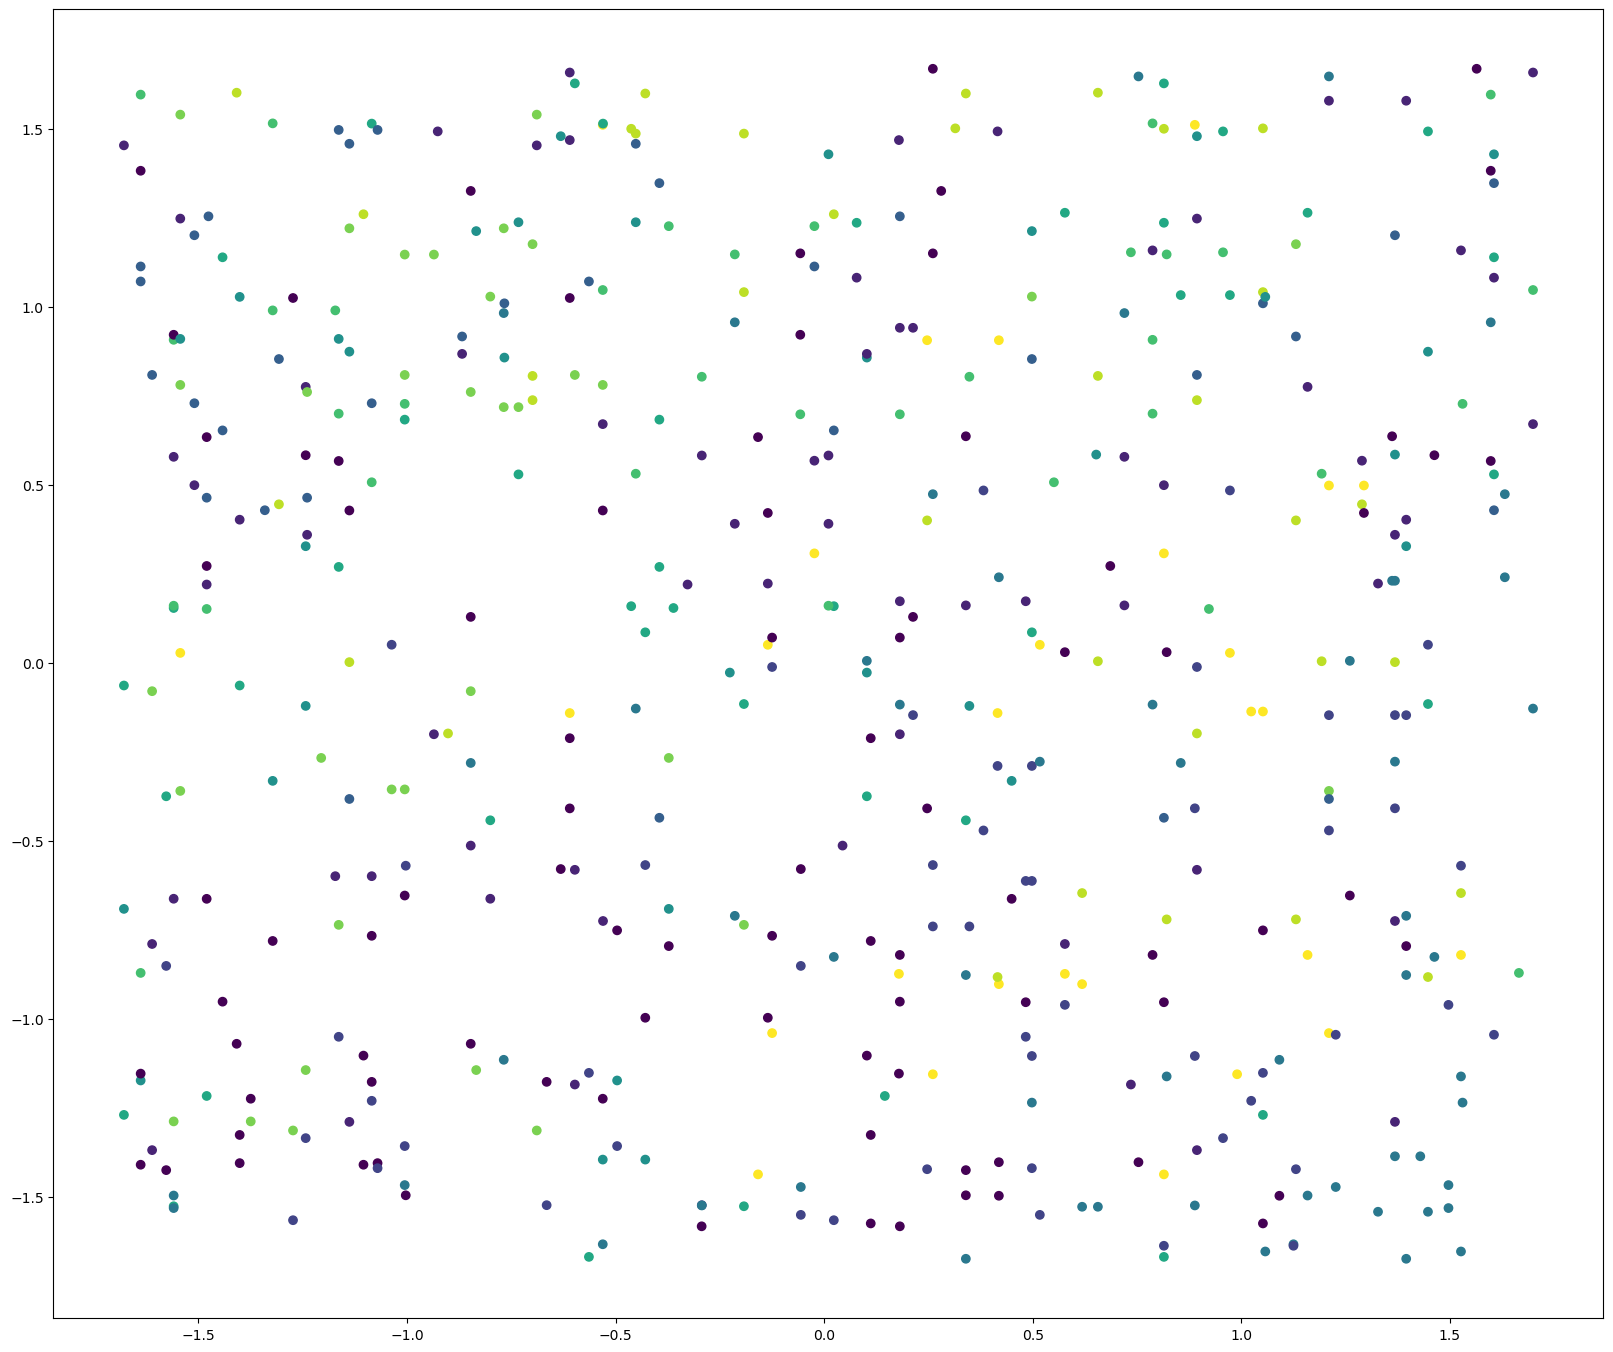

Silhouette Score with Agglomerative Clustering: 0.13103590790060798


In [23]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=11)
pca_df_agg = agg_clustering.fit_predict(df_scaled)
labels = agg_clustering.labels_

# Visualize
plt.figure(figsize=(20, 17))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(df_scaled[:, 2], df_scaled[:, 1], c=labels, cmap='viridis')
plt.show()

score_with_agg = silhouette_score(df_scaled, pca_df_agg)
print(f'Silhouette Score with Agglomerative Clustering: {score_with_agg}')


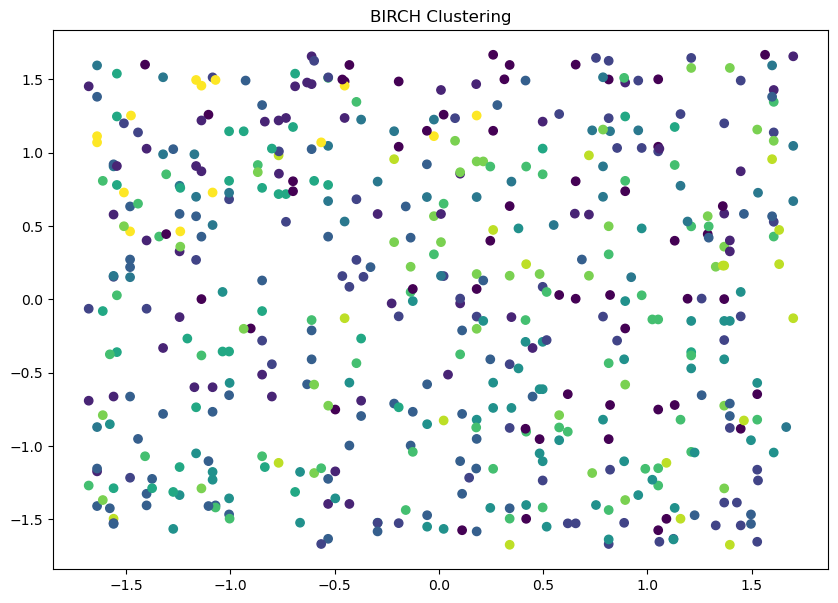

Silhouette Score with BIRCH: 0.12544611477714745


In [25]:
from sklearn.cluster import Birch

# Apply BIRCH clustering
birch = Birch(n_clusters=11)
birch_labels = birch.fit_predict(df_scaled)

# Visualize the results
plt.figure(figsize=(10, 7))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=birch_labels, cmap='viridis')
plt.scatter(df_scaled[:, 2], df_scaled[:, 1], c=birch_labels, cmap='viridis')
plt.title('BIRCH Clustering')
plt.show()

# Calculate silhouette score
score_with_birch = silhouette_score(df_scaled, birch_labels)
print(f'Silhouette Score with BIRCH: {score_with_birch}')

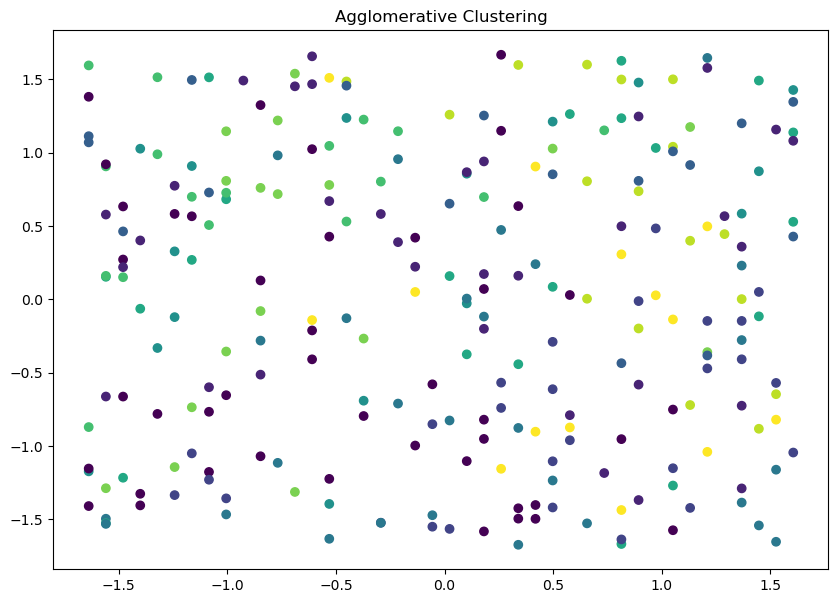

Silhouette Score with Agglomerative Clustering: 0.13103590790060798


In [26]:


# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=11)
agg_labels = agg_clustering.fit_predict(df_scaled)

# Visualize the results
plt.figure(figsize=(10, 7))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=agg_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

# Calculate silhouette score
score_with_agg = silhouette_score(df_scaled, agg_labels)
print(f'Silhouette Score with Agglomerative Clustering: {score_with_agg}')

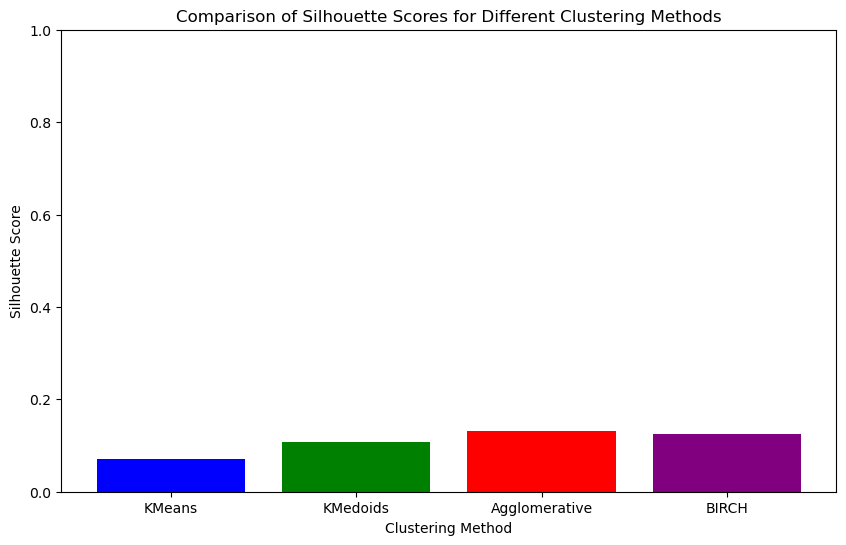

In [28]:
silhouette_scores_dict = {
    'KMeans': score_with_kmean,
    'KMedoids': score_with_kmedoids,
    'Agglomerative': score_with_agg,
    'BIRCH': score_with_birch
}

plt.figure(figsize=(10, 6))
plt.bar(silhouette_scores_dict.keys(), silhouette_scores_dict.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Clustering Method')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Silhouette Scores for Different Clustering Methods')
plt.ylim(0, 1)
plt.show()